In [1]:
!pip install fastf1 matplotlib seaborn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Load preprocessed lap data
df = pd.read_csv("/content/processed_lap_data1.csv")

# Define features and target
features = [
    "DriverID", "TeamID", "TyreCode", "StintNorm",
    "LapTrend", "TimeSeconds", "PaceDeviation", "DeltaToBest", "RollingAvgDriver"
]

X = df[features]
y = df["LapTimeSeconds"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} sec")
print(f"RMSE: {rmse:.3f} sec")
print(f"R²: {r2:.3f}")


MAE: 0.284 sec
RMSE: 0.645 sec
R²: 0.997


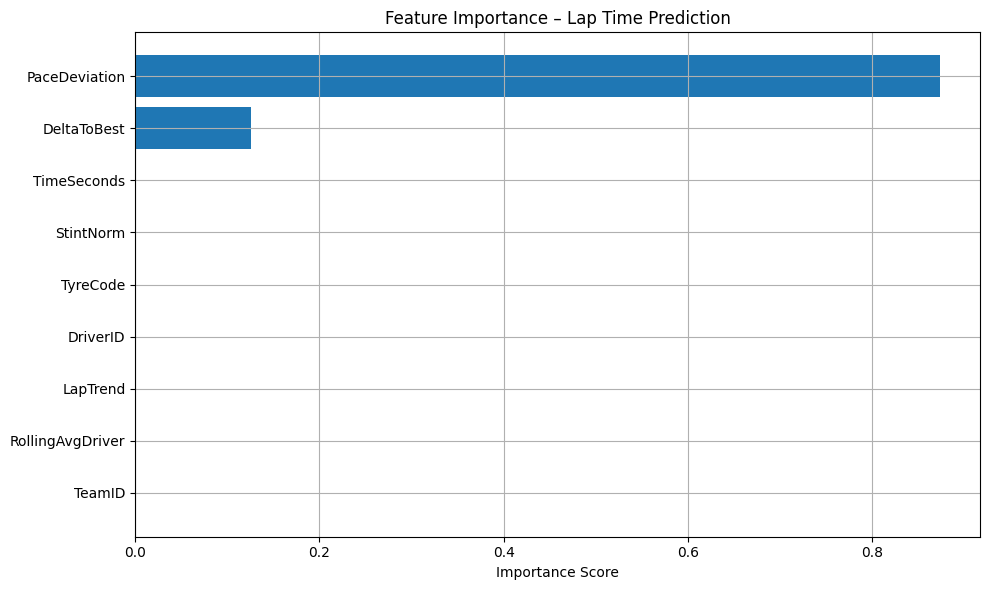

In [7]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], importances[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Feature Importance – Lap Time Prediction")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import os

# Create the 'models' directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the model to disk
model.save_model("models/laptime_predictor_v2.json")

